# Workshop 3 - Pytorch Model Creation
DeepNeuron semester 2 training 2023.

Create a model using Pytorch which acts as a classifier for the CIFAR-10 dataset

**Before starting:**

1. **Don't edit this file, make a copy first:**
  * Click on File -> Save a copy in Drive

2. Also do the following:
  * Click on Runtime -> Change runtime type -> Make sure hardware accelerator is set to GPU


## Imports
Do all your imports here

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torchsummary import summary

## Dataset

Here we use the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
There are 50000 training images and 10000 test images.

In [ ]:
# Define transforms for the training and testing set
training_transforms = transforms.Compose([transforms.RandomRotation(30),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406],
                                                               [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                 [0.229, 0.224, 0.225])])

In [ ]:
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=training_transforms)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

# split train/valid from train set
train_set, valid_set = torch.utils.data.random_split(train_set, [40000, 10000])

Files already downloaded and verified
Files already downloaded and verified


We discussed the shuffle function in Workshop 2.
Please indicate whether the following dataset requires shuffling.

In [ ]:
# ----- set True or False for shuffing ---
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle= )
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle= )
validloader = torch.utils.data.DataLoader(valid_set, batch_size=64, shuffle= )

In [ ]:
# Check what classes are in our dataset

num_classes = len(test_set.classes)
print(num_classes)

10


In [ ]:
out = next(iter(trainloader))
print(out[0].shape)

torch.Size([64, 3, 32, 32])


We find that our input image is of size 32 x 32, in batches of 64.

`output` = `torch.Size([batch_size, depth, height, width])`

Use this image size, to calculate the input dimensions for the fully connected layer with a convolution calculator.

# Model Creation
Create your model here. The model stub has already been created, you will need to define an `__init__` and a `forward()` method for your class.

Your model will need:
1. Convolutional Layer (input_channels = **____**, output_channels = 6, kernel_size = 5)
2. Max Pool (kernel_size = 2, stride = 2)
3. Convolutional Layer (input_channels = **____**, output_channels = 16, kernel_size = 5)
2. Max Pool (kernel_size = 2, stride = 2)
4. Fully Connected Layer (**Figure out the in_features size**, out_features is 120)
5. Fully Connected Layer (in_features is 120, out_features is 84)
5. Fully Connected Layer (in_features is 84, **out_features is the number of classes**)

Then, in your forward pass, the input should flow like so:
1. Convolutional Layer 1
2. ReLU
5. Max Pool
3. Convolutional Layer 2
4. ReLU
5. Max Pool
6. Flatten the input, so it can be passed through the fully connected layers
7. Fully Connected Layer 1
8. ReLU
9. Fully Connected Layer 2
10. ReLU
11. Fully Connected Layer 3

### Hints

All layers are found in nn:
* Fully Connected Layer: `Linear(num_inputs, num_outputs)`
* Max Pooling: `MaxPool2d(kernel_size, stride)`
* Convolutional Layer: `Conv2d(input_channels, output_channels, kernel_size, stride)`
* Define your layers in the `__init__` method of your model
* Flatten a PyTorch tensor using `.flatten()`
* Convolutional Layer Size : `Floor((input_size + 2*padding - kernel) / stride + 1)`
* `conv1(3x32x32)->pooling(6x__x__)->conv2(6x__x__)->pooling(16x__x__)->fc1(16x__x__) -> output (num_class)`

* `conv1(3x32x32)->pooling(6x28x28)->conv2(6x14x14)->pooling(16x10x10)->fc1(16x5x5) -> output (10)`


The ReLU function can be found in `nn.functional.relu()`

Make sure to set the flatten start dimension to 1 (to not flatten out the batch boundaries too): `.flatten(start_dim=1)`



In [ ]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()

    # ------- Your Code here ------------
    # convolutional layer 1
    self.conv1 =
    # convolutional layer 2
    self.conv2 =
    # pooling layer
    self.pool =

    # fully connected layer (fc)
    self.fc1 = nn.Linear(in_features = , out_features = 120) ## find out the in_feature size
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    # the output should be the number of classes
    self.fc3 = nn.Linear(in_features = 84, out_features = ) ## find out the out_features size

  def forward(self, x):
    # ------- Your Code here ------------
    # conv1 -> ReLu() -> Pooling
    x =
    # conv2 -> ReLu() -> Pooling
    x =
    # flatten
    x =
    # put into fc layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


## Deeper CNN
Alternatively we can use `nn.Sequential` build the model. `nn.Sequential` is a sequential container, and we need to sequentially place the desired layers into it according to the desired order.

For more infomation of `nn.Sequential`, you can find it on [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

In [ ]:
class DeeperCNN(nn.Module):
    def __init__(self):
      super(DeeperCNN, self).__init__()

      self.cnn_layer=nn.Sequential(
            nn.Conv2d(3, 128, 5, 1, 2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 5, 1, 2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(p=0.25),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(p=0.25))

      self.dense_fc=nn.Sequential(
            nn.Linear(256 * 8 * 8, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 10)
        )
    # definde how to execute
    def forward(self, x):
        x= self.cnn_layer(x)
        x = x.flatten(1)
        x = self.dense_fc(x)
        return x

### More Models

Instead of designing the models by yourself, you can also import the models from [torchvision](https://pytorch.org/vision/stable/models.html).

For example: ResNet, AlexNet, VGG, ..

#Training Using Your Model
It's time to train your model!

We use a basic PyTorch training loop, with standard built-in datasets, dataloaders and training loops

In [ ]:
class Train_model():
    def __init__(self, model, criterion, optimizer, device):
        self.model=model
        self.criterion=criterion #loss function
        self.optimizer=optimizer
        self.device=device

    def train_epoch(self, trainloader):
        model = self.model.train() # puts the model in training mode
        correct=0
        running_loss = 0.0
        progress_bar=tqdm(trainloader)
        for data in progress_bar:
            batch, labels = data  # separate inputs and labels (outputs)
            batch, labels = batch.to(self.device), labels.to(self.device)  # puts the data on the GPU

            self.optimizer.zero_grad() # clear the gradients in model parameters
            outputs = model(batch) # put data into model to predict
            loss = self.criterion(outputs, labels) # calculate loss between prediction and true labels
            loss.backward() # back propagation: pass the loss
            self.optimizer.step()  # iterate over all parameters in the model with requires_grad=True and update their weights.

            # compute training statistics
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() # sum total loss in current epoch for print later
            progress_bar.set_postfix(loss=loss.item())

        avg_loss = running_loss / len(train_set)
        avg_acc = correct / len(train_set)

        return avg_loss, avg_acc

    def eval_model(self, validloader):
        model=self.model.eval() # puts the model in validation mode
        with torch.no_grad():
            loss_val = 0.0
            correct_val = 0
        for data in tqdm(validloader):
            batch, labels = data
            batch, labels = batch.to(self.device), labels.to(self.device)
            outputs = model(batch)
            loss = self.criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            loss_val += loss.item()
        avg_loss_val = loss_val / len(valid_set)
        avg_acc_val = correct_val /len(valid_set)

        return avg_loss_val, avg_acc_val

    def test(self, testloader):
        correct = 0
        model=self.model.eval()
        with torch.no_grad(): # no gradient calculation
            for data in testloader:
                batch, labels = data
                batch, labels = batch.to(self.device), labels.to(self.device)
                outputs = model(batch)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
        return ('Accuracy on the test images: %.2f %%' % (100 * correct / len(test_set)))


# Training Time
1. SimpleCNN
2. Deeper CNN

We now need to define our loss function and optimiser

In [ ]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Determine whether a GPU is available
criterion = nn.CrossEntropyLoss().to(device)  # We use Cross Entropy Loss, as this is a classification task


## SimpleCNN
simplecnn=SimpleCNN()
simplecnn.to(device) # send model to GPU
optimizer = optim.Adam(simplecnn.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False) # If in doubt, we use Adam as our optimiser

SimpleModel=Train_model(simplecnn, criterion, optimizer, device)

## DeeperCNN
deepercnn=DeeperCNN()
deepercnn.to(device) # send model to GPU
optimizer = optim.Adam(deepercnn.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False) # If in doubt, we use Adam as our optimiser

DeeperModel=Train_model(deepercnn, criterion, optimizer, device)


In [ ]:
epoch=10
#acc log for graph
simp_acc_hist = []
simp_acc_hist_val =[]
for e in range(epoch):
  print(f'Epoch {e + 1}/{epoch}')
  print('-' * 10)
  simple_train_loss ,simple_train_acc= SimpleModel.train_epoch(trainloader)
  simp_acc_hist.append(simple_train_acc)
  print(f'Train loss {simple_train_loss} accuracy {simple_train_acc}')

  simple_val_loss, simple_val_acc = SimpleModel.eval_model(validloader)
  simp_acc_hist_val.append(simple_val_acc)

  print(f'Val loss {simple_val_loss} accuracy {simple_val_acc}')
  print()

Epoch 1/10
----------


100%|██████████| 625/625 [00:21<00:00, 28.82it/s, loss=1.9]


Train loss 0.029010941043496132 accuracy 0.296125


100%|██████████| 157/157 [00:05<00:00, 30.91it/s]


Val loss 0.030129196715354918 accuracy 0.277

Epoch 2/10
----------


100%|██████████| 625/625 [00:21<00:00, 29.29it/s, loss=1.64]


Train loss 0.028820507594943045 accuracy 0.294925


100%|██████████| 157/157 [00:05<00:00, 31.02it/s]


Val loss 0.028865650868415832 accuracy 0.2924

Epoch 3/10
----------


100%|██████████| 625/625 [00:22<00:00, 27.95it/s, loss=1.81]


Train loss 0.02878865431547165 accuracy 0.297975


100%|██████████| 157/157 [00:04<00:00, 32.11it/s]


Val loss 0.029706427943706513 accuracy 0.2866

Epoch 4/10
----------


100%|██████████| 625/625 [00:21<00:00, 28.69it/s, loss=1.81]


Train loss 0.028878353616595267 accuracy 0.294225


100%|██████████| 157/157 [00:04<00:00, 34.31it/s]


Val loss 0.028764764845371247 accuracy 0.3061

Epoch 5/10
----------


100%|██████████| 625/625 [00:22<00:00, 27.93it/s, loss=1.76]


Train loss 0.028741575187444687 accuracy 0.2979


100%|██████████| 157/157 [00:04<00:00, 36.17it/s]


Val loss 0.02956011904478073 accuracy 0.2967

Epoch 6/10
----------


100%|██████████| 625/625 [00:22<00:00, 28.23it/s, loss=1.59]


Train loss 0.028253304451704025 accuracy 0.30935


100%|██████████| 157/157 [00:04<00:00, 36.48it/s]


Val loss 0.028035485899448393 accuracy 0.3175

Epoch 7/10
----------


100%|██████████| 625/625 [00:24<00:00, 25.80it/s, loss=1.77]


Train loss 0.027710974583029745 accuracy 0.322475


100%|██████████| 157/157 [00:04<00:00, 34.76it/s]


Val loss 0.02757817256450653 accuracy 0.3328

Epoch 8/10
----------


100%|██████████| 625/625 [00:31<00:00, 20.09it/s, loss=1.79]


Train loss 0.027592433390021324 accuracy 0.323925


100%|██████████| 157/157 [00:04<00:00, 36.31it/s]


Val loss 0.028167283511161805 accuracy 0.3232

Epoch 9/10
----------


100%|██████████| 625/625 [00:26<00:00, 23.67it/s, loss=1.88]


Train loss 0.02761045490205288 accuracy 0.32755


100%|██████████| 157/157 [00:04<00:00, 36.15it/s]


Val loss 0.027500066542625427 accuracy 0.3283

Epoch 10/10
----------


100%|██████████| 625/625 [00:26<00:00, 23.61it/s, loss=1.6]


Train loss 0.027446081271767616 accuracy 0.3305


100%|██████████| 157/157 [00:06<00:00, 24.83it/s]

Val loss 0.027838377642631532 accuracy 0.3193



In [ ]:
epoch=10
#acc log for graph
deep_acc_hist = []
deep_acc_hist_val =[]
for e in range(epoch):
  print(f'Epoch {e + 1}/{epoch}')
  print('-' * 10)
  deeper_train_loss ,deeper_train_acc= DeeperModel.train_epoch(trainloader)
  deep_acc_hist.append(deeper_train_acc)
  print(f'Train loss {deeper_train_loss} accuracy {deeper_train_acc}')

  deeper_val_loss, deeper_val_acc = DeeperModel.eval_model(validloader)
  deep_acc_hist_val.append(deeper_val_acc)
  print(f'Val loss {deeper_val_loss} accuracy {deeper_val_acc}')
  print()

Epoch 1/10
----------


100%|██████████| 625/625 [00:46<00:00, 13.49it/s, loss=1.82]


Train loss 0.02761704106628895 accuracy 0.369275


100%|██████████| 157/157 [00:05<00:00, 26.52it/s]


Val loss 0.021998998367786408 accuracy 0.4949

Epoch 2/10
----------


100%|██████████| 625/625 [00:48<00:00, 12.95it/s, loss=1.37]


Train loss 0.02269503333121538 accuracy 0.478275


100%|██████████| 157/157 [00:06<00:00, 24.87it/s]


Val loss 0.01899573192000389 accuracy 0.5614

Epoch 3/10
----------


100%|██████████| 625/625 [00:48<00:00, 12.94it/s, loss=1.3]


Train loss 0.020502244402468204 accuracy 0.5335


100%|██████████| 157/157 [00:07<00:00, 19.95it/s]


Val loss 0.016920807033777237 accuracy 0.6166

Epoch 4/10
----------


100%|██████████| 625/625 [00:49<00:00, 12.64it/s, loss=1.16]


Train loss 0.018596222630143166 accuracy 0.579375


100%|██████████| 157/157 [00:08<00:00, 19.37it/s]


Val loss 0.01615842876434326 accuracy 0.6287

Epoch 5/10
----------


100%|██████████| 625/625 [00:50<00:00, 12.39it/s, loss=1]


Train loss 0.01723764339387417 accuracy 0.615425


100%|██████████| 157/157 [00:08<00:00, 18.82it/s]


Val loss 0.01441739018559456 accuracy 0.6805

Epoch 6/10
----------


100%|██████████| 625/625 [00:49<00:00, 12.58it/s, loss=1.17]


Train loss 0.01629855780005455 accuracy 0.6375


100%|██████████| 157/157 [00:05<00:00, 26.27it/s]


Val loss 0.014214747279882431 accuracy 0.6813

Epoch 7/10
----------


100%|██████████| 625/625 [00:52<00:00, 11.97it/s, loss=0.87]


Train loss 0.015547259148955345 accuracy 0.65445


100%|██████████| 157/157 [00:06<00:00, 22.71it/s]


Val loss 0.01328824110031128 accuracy 0.7051

Epoch 8/10
----------


100%|██████████| 625/625 [00:47<00:00, 13.24it/s, loss=0.966]


Train loss 0.014848253993690014 accuracy 0.67175


100%|██████████| 157/157 [00:06<00:00, 24.92it/s]


Val loss 0.012666886341571808 accuracy 0.7187

Epoch 9/10
----------


100%|██████████| 625/625 [00:48<00:00, 12.91it/s, loss=0.973]


Train loss 0.014337702643871308 accuracy 0.6828


100%|██████████| 157/157 [00:05<00:00, 26.30it/s]


Val loss 0.012003486430644989 accuracy 0.7338

Epoch 10/10
----------


100%|██████████| 625/625 [00:50<00:00, 12.50it/s, loss=0.956]


Train loss 0.013869400681555271 accuracy 0.69545


100%|██████████| 157/157 [00:09<00:00, 16.78it/s]

Val loss 0.011508151215314864 accuracy 0.7484



## Test Results

Let's see the testing result from both models

In [ ]:
SimpleModel.test(testloader)

'Accuracy on the test images: 33.43 %'

In [ ]:
DeeperModel.test(testloader)

'Accuracy on the test images: 77.85 %'

# Model Comparison

Let's compare the details and parameters of these two models

In [ ]:
# SimpleCNN
summary(simplecnn,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [ ]:
# DeeperCNN
summary(deepercnn,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           9,728
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]         409,728
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
         MaxPool2d-7          [-1, 128, 16, 16]               0
         Dropout2d-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 256, 16, 16]         295,168
      BatchNorm2d-10          [-1, 256, 16, 16]             512
             ReLU-11          [-1, 256, 16, 16]               0
           Conv2d-12          [-1, 256, 16, 16]         590,080
      BatchNorm2d-13          [-1, 256, 16, 16]             512
             ReLU-14          [-1, 256,

We now want to visualise our training :

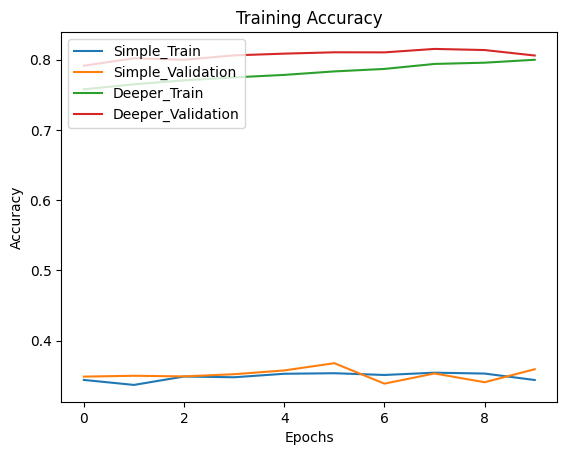

In [ ]:
import matplotlib.pyplot as plt

legend = ['Simple_Train', 'Simple_Validation', 'Deeper_Train', 'Deeper_Validation']
plt.plot(simp_acc_hist)
plt.plot(simp_acc_hist_val)
plt.plot(deep_acc_hist)
plt.plot(deep_acc_hist_val)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(legend, loc='upper left')
plt.show()

## Once you're done...
Even though the accuracy increases and the loss decreases, our model is not very good. This is normal. Try to improve your accuracy! Things you can change:
- Learning rate
- Number of epochs of training
- Batch size
- Different transforms
- Model structure (number of layers, convolutional layer properties, new layer types like Dropout)

Ultimately, it takes a lot of experimentation and gut feel to go from a basic training loop to an optimised model. There are tools to optimise these hyperparameters, but its always useful to be able to know a good place to start. As with most things, practice makes perfect.